## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import json
import os
import requests
import pandas as pd
try: import dateparser
except:
    print('No Module called Dateparser. Installing Daterparser')
    !pip install dateparser
    import dateparser
from collections import defaultdict
import xmltodict
from functions import *
import numpy as np
from ccfMitchell import ccf

## Parsing and Plotting Data Functions

In [2]:
def aggregate_data_month(dates_vals, aggregate_func=max):
    dates_vals = [(dateparser.parse(i[0]), i[1]) for i in dates_vals]
    month_vals = defaultdict(float)
    for (date, val) in dates_vals:
        year, month = date.year, date.month
        year_month_str = '{}-{}'.format(year, month)
        month_vals[year_month_str] = aggregate_func(month_vals[year_month_str],val)
    return load_year_month(month_vals)
            
    
def plot_year_yearmonth_load(load_filepath, main_title='', plot=True):
    data = json.load(open(load_filepath))
    yearPublished = data['yearPublished']
    yearMonthPublished = data['yearMonthPublished']
    
    yearPublished_count_list = load_year(yearPublished)
    yearPublished_month_count_list_2007 = load_year_month(yearMonthPublished, year_range=[None, 2007])
    yearPublished_month_count_list_2014 = load_year_month(yearMonthPublished, year_range=[2008, 2014])
    yearPublished_month_count_list_2020 = load_year_month(yearMonthPublished, year_range=[2015, None])
    
    if plot:
        plot_timeseries([
            {'count_list': yearPublished_count_list, 'label':'Article YearPublished'},
        ], main_title+' Article YearPublished vs Year Counts', 'Year', 'Year Counts', True)

        plot_timeseries([
            {'count_list': yearPublished_month_count_list_2007, 'label':'Article YearPublished'},
        ], main_title+' Article YearPublished vs Year-Month Counts - 2007', 'Year-Month', 
            'Year-Month Counts', True, True)

        plot_timeseries([
            {'count_list': yearPublished_month_count_list_2014, 'label':'Article YearPublished'},
        ], main_title+' Article YearPublished vs Year-Month Counts - 2014', 'Year-Month', 
            'Year-Month Counts', True, True)

        plot_timeseries([
            {'count_list': yearPublished_month_count_list_2020, 'label':'Article YearPublished'},
        ], main_title+' Article YearPublished vs Year-Month Counts - 2020', 'Year-Month', 
            'Year-Month Counts', True, True)
    return yearPublished_count_list, yearPublished_month_count_list_2007, \
            yearPublished_month_count_list_2014, yearPublished_month_count_list_2020

## Media Data Timeseries

### Regular Timeseries

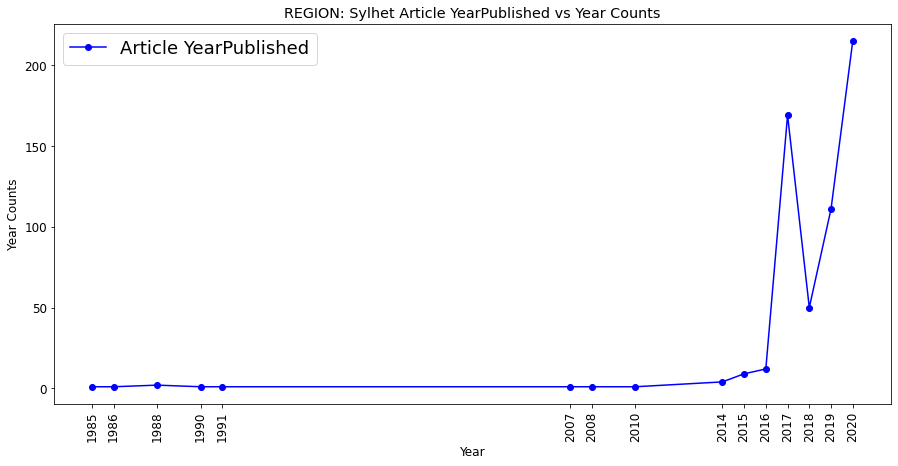

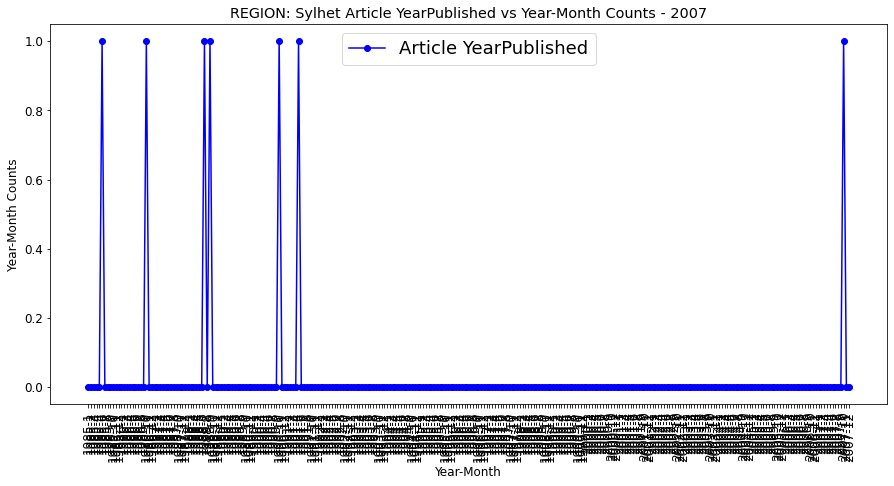

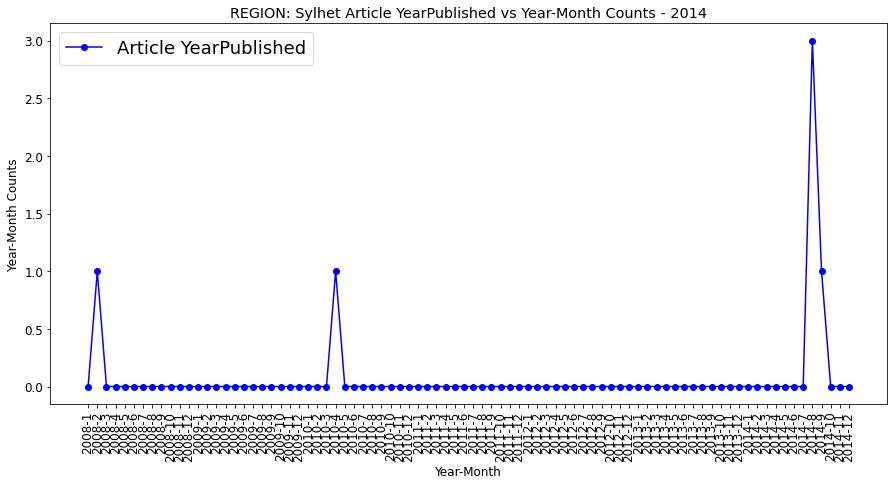

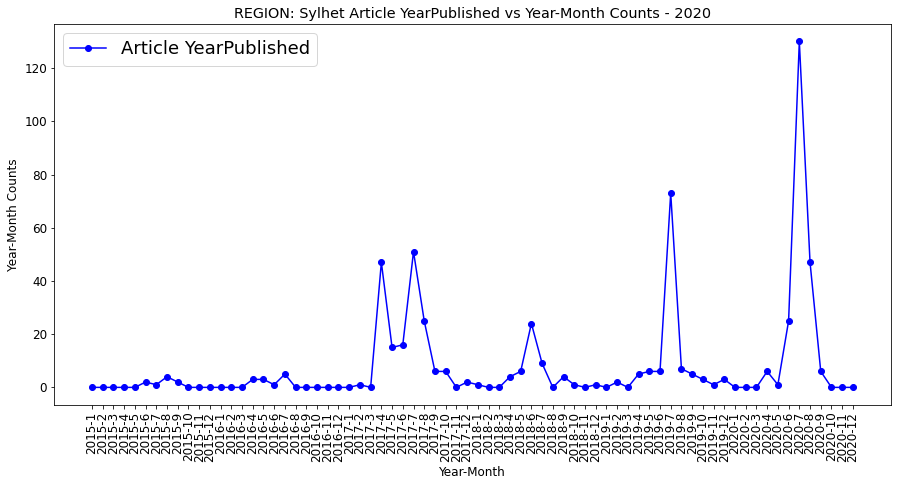

In [11]:
# ym = plot_year_yearmonth_load('timeseries_data/all.json', '')
ym = plot_year_yearmonth_load('timeseries_data/yearPublished_year_month/sylhet.json', 'REGION: Sylhet')
# ym = plot_year_yearmonth_load('timeseries_data/chittagong.json', 'REGION: Chittagong')
# ym = plot_year_yearmonth_load('timeseries_data/dhaka.json', 'REGION: Dhaka')
# ym = plot_year_yearmonth_load('timeseries_data/rangpur.json', 'REGION: Rangpur')
# ym = plot_year_yearmonth_load('timeseries_data/rajshahi.json', 'REGION: Rajshahi')
# ym = plot_year_yearmonth_load('timeseries_data/khulna.json', 'REGION: Khulna')
# ym = plot_year_yearmonth_load('timeseries_data/barisal.json', 'REGION: Barisal')


### Scraped Site Distribution

Total Number of Articles Scraped (Regardless of flood event articles or not) from all newspapers and flood event articles extracted from these sites vs Year Published

<Figure size 1080x504 with 0 Axes>

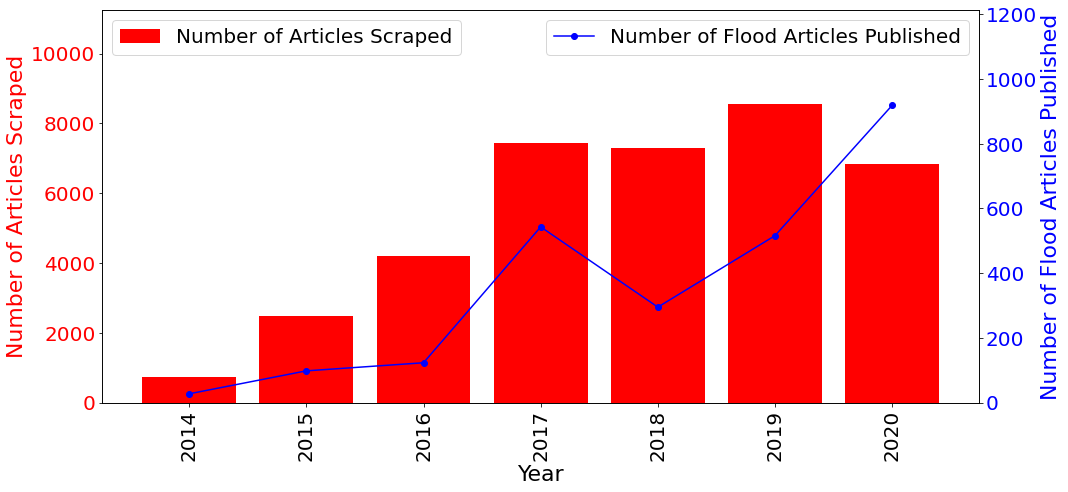

In [3]:
site_distribution = json.load(open('timeseries_data/logistics/scraped_data_distribution.json'))
site_distribution_list = load_year(site_distribution['data_year'])

yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/all.json', '', plot=False)
yearPublished_count_list = [i for i in yearPublished_count_list if int(i[0])>=2014]
site_distribution_list = [i for i in site_distribution_list if int(i[0])>=2014]
yearPublished_count_list, site_distribution_list = match_years(yearPublished_count_list, site_distribution_list)
plt_args = {
    'titleFontSize': 24,
    'xticksFontSize': 20,
    'yticksFontSize': 20,
    'xlabelFontSize': 22,
    'ylabelFontSize': 22,
    'legendFontSize': 20
}
plot_2timeseries(
            {'count_list': site_distribution_list, 'label':'Number of Articles Scraped', 
             'type': 'bar', 'color':'r', 'ylabel':'Number of Articles Scraped', 'ylim_min':0},
            {'count_list': yearPublished_count_list, 'label':'Number of Flood Articles Published', 
             'color': 'b', 'ylabel': 'Number of Flood Articles Published'},
            '',
            'Year', True, plt_args=plt_args, year_range=None)

## Comparisons

### Government Area Affected Data

In [4]:
filepath = 'other_data/Flood_Affected_Area_Barchart.csv'
faf_df = pd.read_csv(filepath)
faf_df.head()

,Year,Flood affected area,Sq-Km %
0,1954,36800,25.0
1,1955,50500,34.0
2,1956,35400,24.0
3,1960,28400,19.0
4,1961,28800,20.0


<Figure size 1080x504 with 0 Axes>

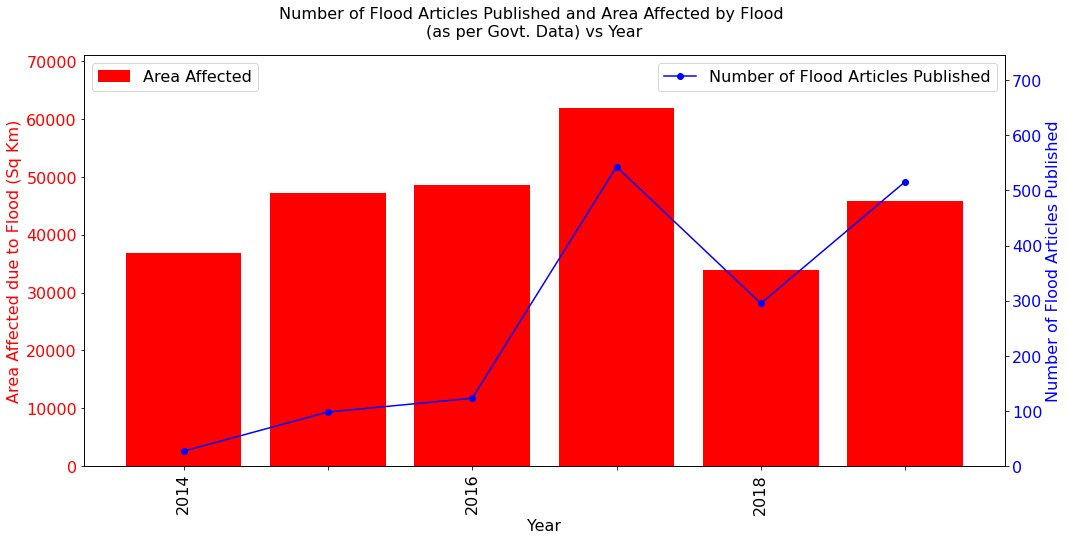

In [6]:
faf_year_flood_affected = [(row[1]['Year'], int(row[1]['Flood affected area'].replace(',',''))) 
                           for row in faf_df.iterrows()]

yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/all.json', '', plot=False)
yearPublished_count_list, faf_year_flood_affected = match_years(yearPublished_count_list, faf_year_flood_affected)
faf_year_flood_affected = [i for i in faf_year_flood_affected if int(i[0])>=2014 and int(i[0])<2020]
yearPublished_count_list = [i for i in yearPublished_count_list if int(i[0])>=2014 and int(i[0])<2020]

plot_2timeseries(
            {'count_list': faf_year_flood_affected, 'label':'Area Affected', 
             'type': 'bar', 'color':'r', 'ylabel':'Area Affected due to Flood (Sq Km)', 'ylim_min':0},
            {'count_list': yearPublished_count_list, 'label':'Number of Flood Articles Published', 
             'color': 'b', 'ylabel': 'Number of Flood Articles Published'},
            'Number of Flood Articles Published and Area Affected by Flood \n(as per Govt. Data) vs Year', 
            'Year', True, xticksFontSize=14, skip=2)

### Red Cross Damage Data

In [154]:
filepath = 'other_data/Damage data_Hassan.csv'
damage_df = pd.read_csv(filepath)
damage_df = damage_df.fillna(0)
damage_df['Embankment Damages'] = pd.to_numeric(damage_df['Embankment Damages'], errors='coerce').fillna(0)
damage_df

,Year,No. of Dead People,No. of House damage Fully,No. of House Damage (Partialy),Crops damaged Fully (Acre),Crops damage Partialy (Acre),No. of Dead Livestock,Road Damage Fully (Km),Road Damage Partialy (km),Embankment Damages
0,1986,57,196803,279212,990573,711616,42374,3094,1610,13.0
1,1987,1470,71572,1691104,2983362,1873207,370129,12624,11534,1272.0
2,1988,1621,1151189,2536408,1119998,9993436,398018,47042,19675,1718.0
3,1989,23,3203,16096,58568,102716,51548,289,2195,0.0
4,1990,41,14101,58418,37987,125089,8716,171,1210,125.0
5,1991,818,340043,573446,1220225,1065044,46306,1692,8919,649.0
6,1993,162,234393,615336,778513,521204,29512,4367,12217,1013.0
7,1994,10,19177,31005,55325,48133,8666,60,475,18.0
8,1995,246,898708,2014027,2823751,2023314,58100,8881,13463,2876.0
9,1996,76,218275,598818,404456,605312,47946,1635,10922,448.0


### Passive Microwave data

In [6]:
def compare_PMW_NLP(division):
    folderpath_pmw_cm, folderpath_pmw_flood = 'other_data/pmv_cm_ts', 'other_data/pmw_flood_ts'
    files_pmw_cm = [f for f in os.listdir(folderpath_pmw_cm) if '.csv' in f]
    files_pmw_flood = [f for f in os.listdir(folderpath_pmw_flood) if '.csv' in f]
    pmw_cv_df, pmw_flood_df = None, None
    for filepath in files_pmw_cm:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_pmw_cm, filepath))
        if pmw_cv_df is None: pmw_cv_df = temp_df
        else: pmw_cv_df = pd.concat([pmw_cv_df,temp_df])
    for filepath in files_pmw_flood:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_pmw_flood, filepath))
        if pmw_flood_df is None: pmw_flood_df = temp_df
        else: pmw_flood_df = pd.concat([pmw_flood_df,temp_df])
            
    yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
    yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/{}.json'.format(division), '', plot=False)
    
    pmw_cv_df_list = [(row[1]['Date'], row[1]['C/M ratio']) for row in pmw_cv_df.iterrows()]
    pmw_cv_month_count_list = aggregate_data_month(pmw_cv_df_list)
    yearPublished_month_count_list_2019, pmw_cv_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, pmw_cv_month_count_list, year_range=[2017, 2019])

    plot_2timeseries(
            {'count_list': pmw_cv_month_count_list_2019, 'label':'4 day moving averages of \nraw C/M Ratio from PMW', 
             'color':'r', 'ylabel':'C/M PMW raw ratio'},
            {'count_list': yearPublished_month_count_list_2019, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            '{} Number of Articles Containing Flood Events and 4 Day moving Average of\n\
C/M Ratio vs Year-Month of flood event'.format(division.upper()), 'Year-Month', True)
    
    pmw_flood_df_list = [(row[1]['Date'], row[1]['Total Flooded Area']) for row in pmw_flood_df.iterrows()]
    pmw_flood_month_count_list = aggregate_data_month(pmw_flood_df_list)
    yearPublished_month_count_list_2019, pmw_flood_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, pmw_flood_month_count_list, year_range=[2017, 2019])
    
    plot_2timeseries(
            {'count_list': pmw_flood_month_count_list_2019, 
             'label':'Area Flooded (thresholding C/M \nsignal at 2 std dev)', 
             'color':'r', 'ylabel':'Total Area Flooded'},
            {'count_list': yearPublished_month_count_list_2019, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            '{} Number of Articles Containing Flood Events and Total Area Flooded \n(thresholding C/M\
signal at 2 std dev) vs Year-Month of flood event'.format(division.upper()), 'Year-Month', True)
    
    pmw_flood_fraction_df_list = [(row[1]['Date'], row[1]['Fraction of District Flooded']) for row in pmw_flood_df.iterrows()]
    pmw_flood_fraction_month_count_list = aggregate_data_month(pmw_flood_fraction_df_list)
    yearPublished_month_count_list_2019, pmw_flood_fraction_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, pmw_flood_fraction_month_count_list, year_range=[2017, 2019])

    plot_2timeseries(
            {'count_list': pmw_flood_fraction_month_count_list_2019, 
             'label':'Fraction Flooded Flooded \n(thresholding C/M signal at 2 std dev)', 
             'color':'r', 'ylabel':'Fraction District Flooded'},
            {'count_list': yearPublished_month_count_list_2019, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            '{} Number of Articles Containing Flood Events and Fraction District Flooded \n(thresholding\
C/M signal at 2 std dev) vs Year-Month of flood event'.format(division.upper()), 'Year-Month', True)
    
    ccf(pmw_flood_fraction_month_count_list_2019, yearPublished_month_count_list_2019, tupList=True, plot=True,
    title='{} Number of Articles Containing Flood Events and Fraction District Flooded \n(thresholding\
C/M signal at 2 std dev) vs Year-Month of flood event'.format(division.upper()), lag_max=25)


<Figure size 1080x504 with 0 Axes>

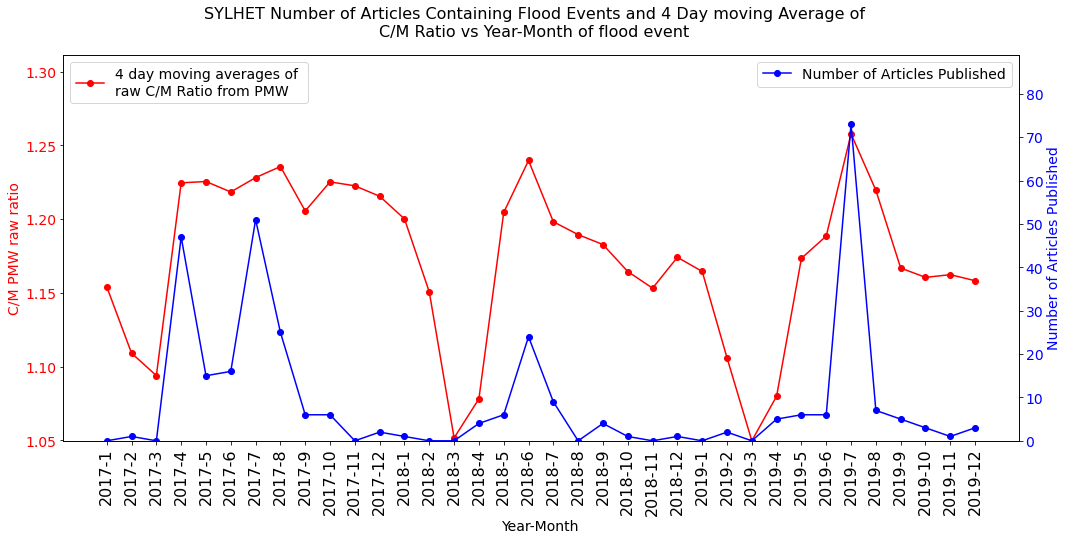

<Figure size 1080x504 with 0 Axes>

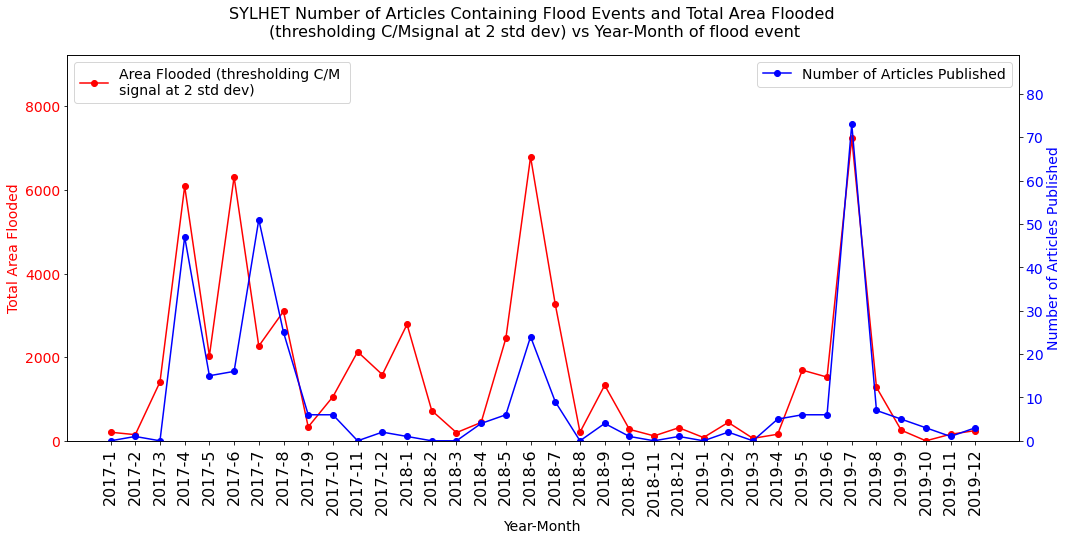

<Figure size 1080x504 with 0 Axes>

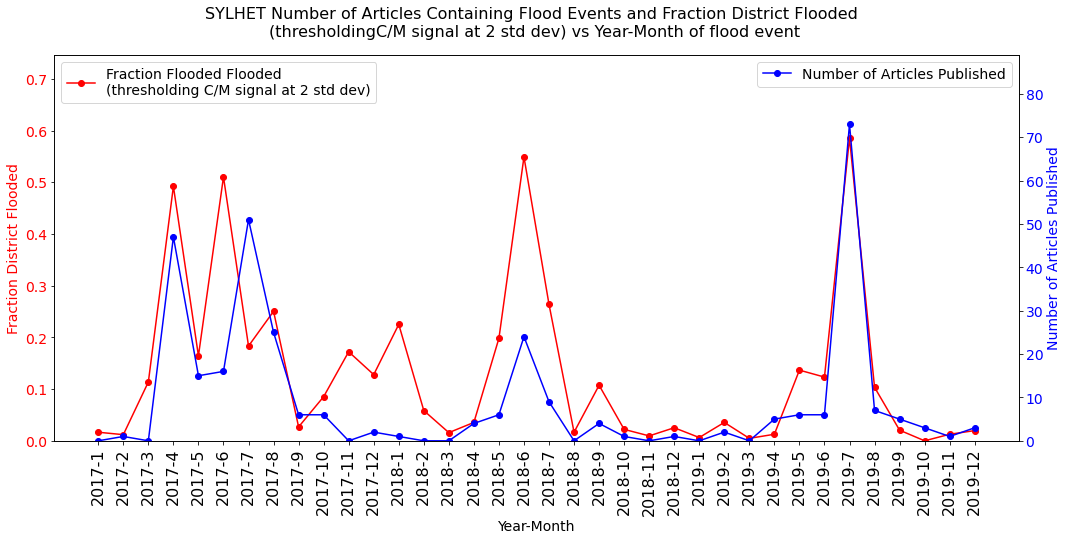

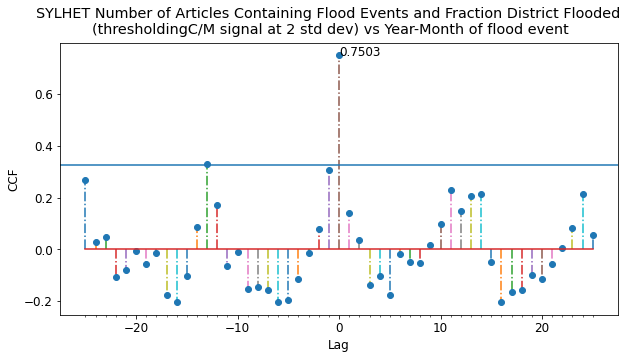

In [7]:
compare_PMW_NLP('sylhet')

<Figure size 1080x504 with 0 Axes>

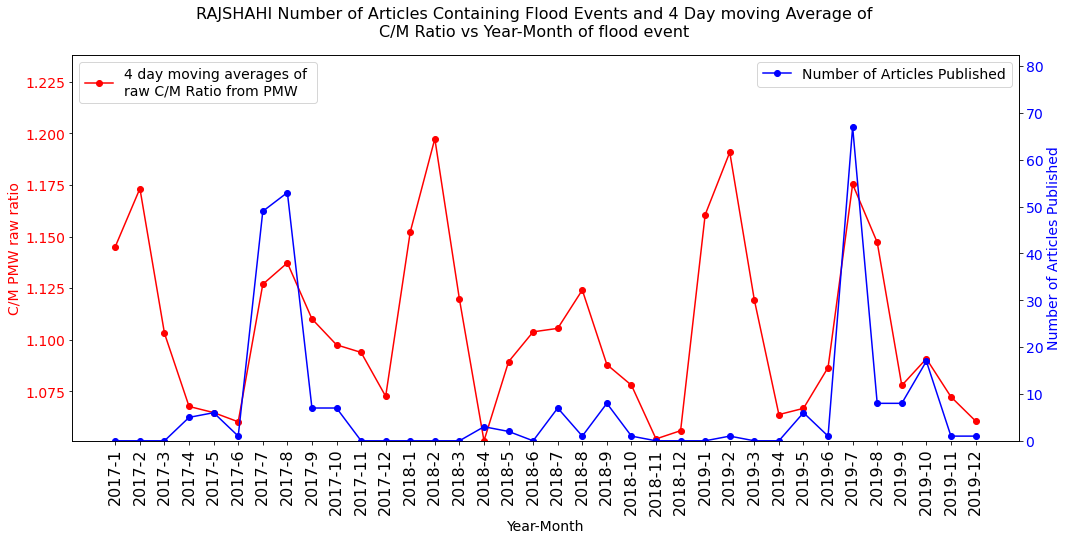

<Figure size 1080x504 with 0 Axes>

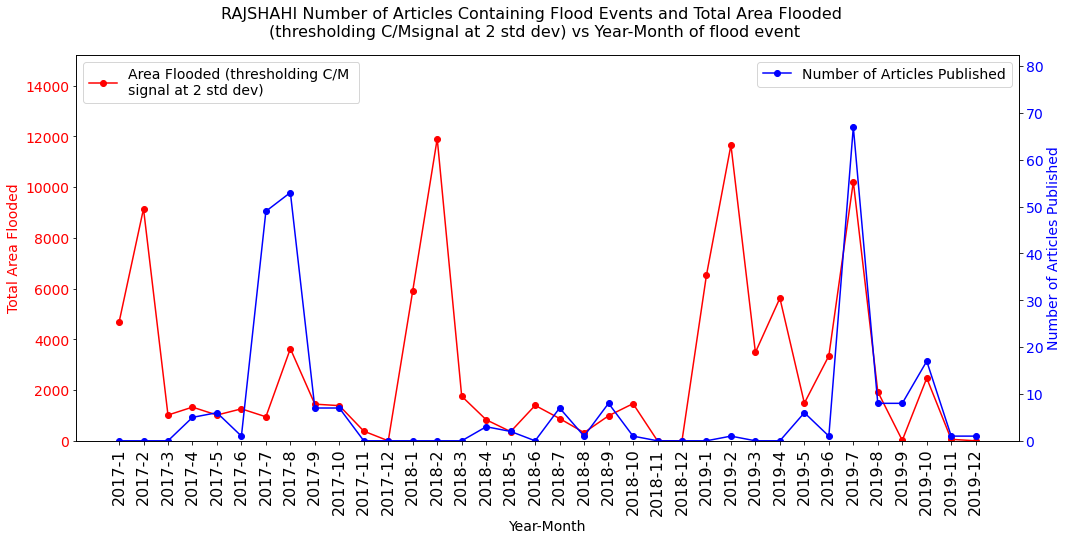

<Figure size 1080x504 with 0 Axes>

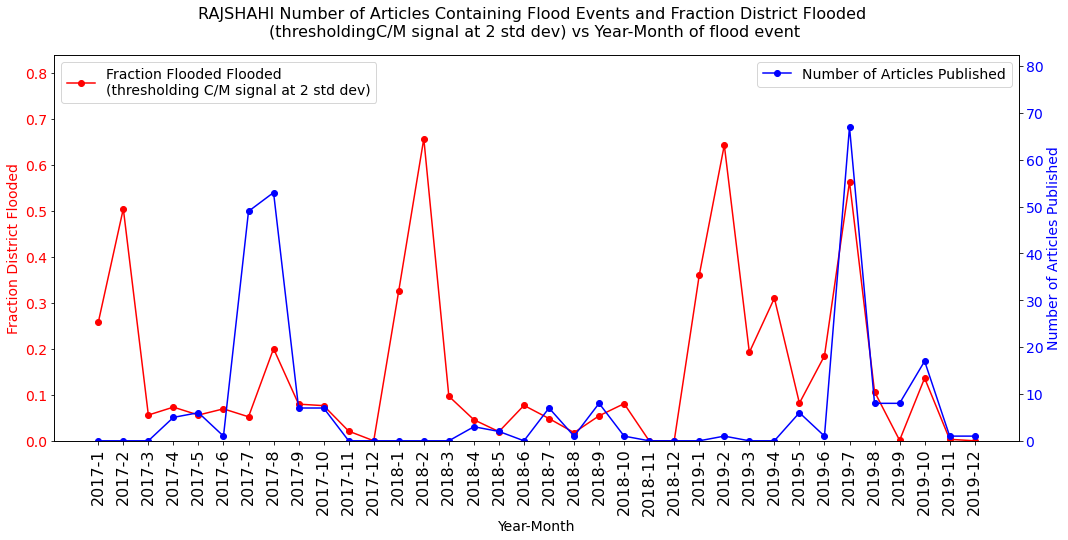

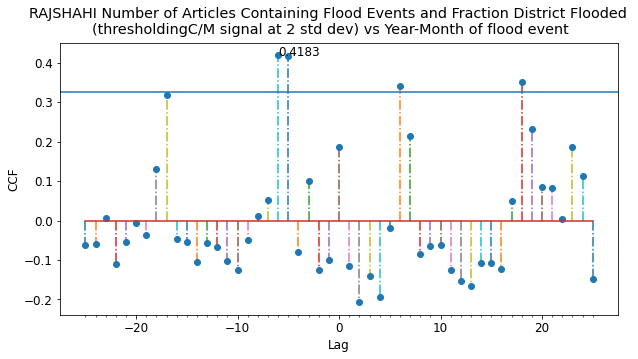

In [8]:
compare_PMW_NLP('rajshahi')

### Sentinel 1 Data

In [10]:
def compare_Sentinel_NLP(division):
    folderpath_s1 = 'other_data/Sentinel1_ts'
    files_s1 = [f for f in os.listdir(folderpath_s1) if '.csv' in f]
    s1_df = None
    for filepath in files_s1:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_s1, filepath))
        if s1_df is None: s1_df = temp_df
        else: s1_df = pd.concat([s1_df,temp_df])
    yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
    yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/yearPublished_year_month/{}.json'.format(division), '', plot=False)
    
    s1_df_list = [(row[1]['Dates'], row[1]['Flooded Area (m^2)']) for row in s1_df.iterrows()]
    s1_month_count_list = aggregate_data_month(s1_df_list)
    s1_month_count_list = [(i,j/1000000) for i,j in s1_month_count_list]
    yearPublished_month_count_list_2019, s1_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, s1_month_count_list, year_range=[2017, 2020])
    plt_args = {
        'xticksFontSize': 20,
        'yticksFontSize': 20,
        'xlabelFontSize': 22,
        'ylabelFontSize': 22,
        'legendFontSize': 22,
    }
    plot_2timeseries(
            {'count_list': s1_month_count_list_2019, 'label':'1,000 * Total Area Flooded (km^2)', 
             'color':'r', 'ylabel':'Sentinel1 1,000 * Total \nArea Flooded (km^2)'},
            {'count_list': yearPublished_month_count_list_2019, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            '{} Number of Articles Containing Flood Events and \n1,000 * Total Area Flooded (km^2) (Sentinel1)\
vs Year-Month of flood event'.format(division.upper()), 'Year-Month', True, skip=2, plt_args=plt_args)
    
    ccf(s1_month_count_list_2019, yearPublished_month_count_list_2019, tupList=True, plot=True,
    title='{} Number of Articles Containing Flood Events and \n1,000 * Total Area Flooded (km^2) (Sentinel1)\
    vs Year-Month of flood event'.format(division.upper()), lag_max=25)


<Figure size 1080x504 with 0 Axes>

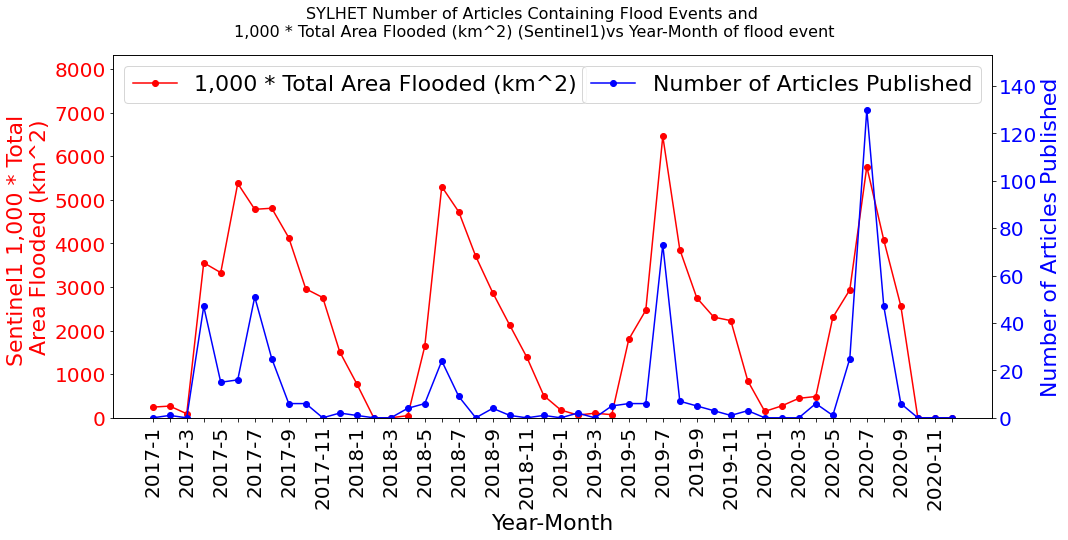

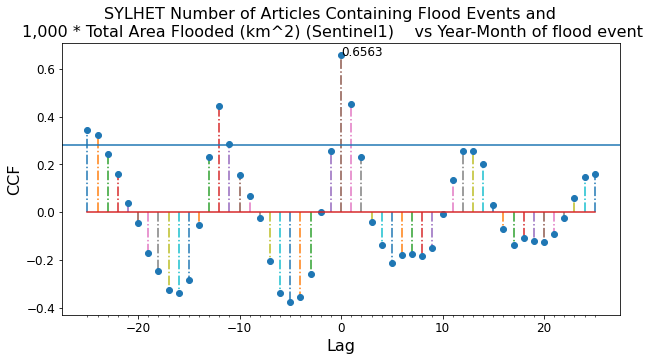

In [11]:
compare_Sentinel_NLP('sylhet')

<Figure size 1080x504 with 0 Axes>

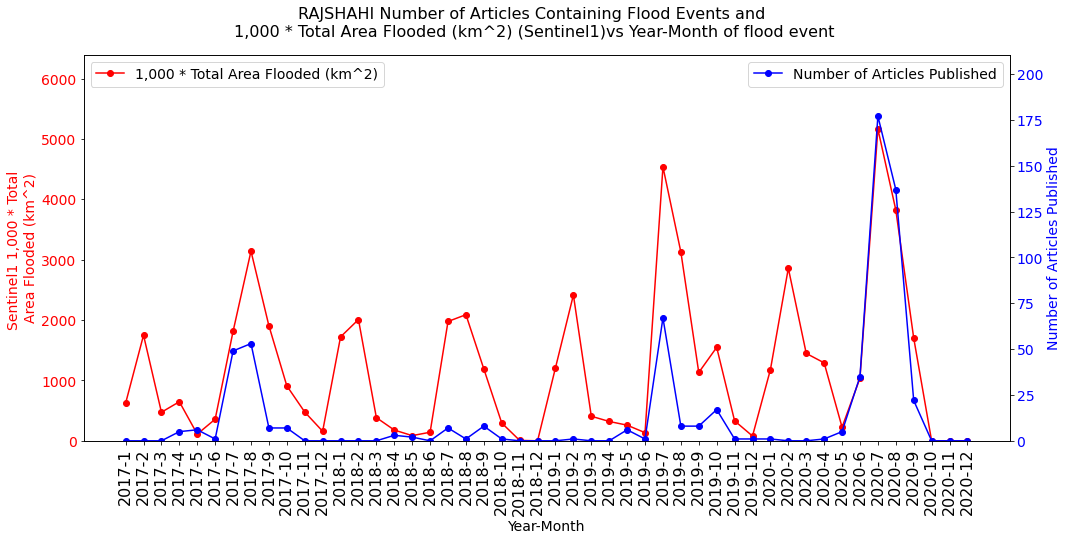

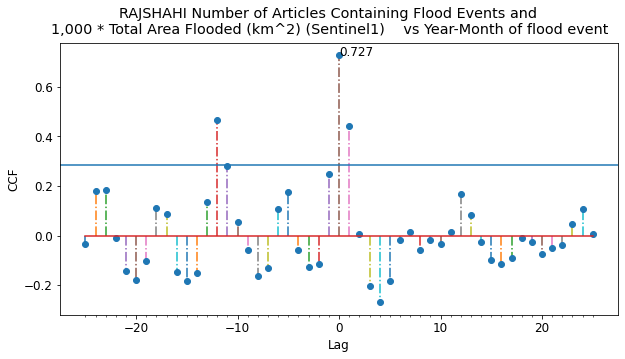

In [11]:
compare_Sentinel_NLP('rajshahi')

### PMW, Sentinel1, Media

In [3]:
def compare_PMW_Sentinel_NLP(division):
    folderpath_pmw_cm, folderpath_pmw_flood = 'other_data/pmv_cm_ts', 'other_data/pmw_flood_ts'
    files_pmw_cm = [f for f in os.listdir(folderpath_pmw_cm) if '.csv' in f]
    files_pmw_flood = [f for f in os.listdir(folderpath_pmw_flood) if '.csv' in f]
    pmw_cv_df, pmw_flood_df = None, None
    for filepath in files_pmw_cm:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_pmw_cm, filepath))
        if pmw_cv_df is None: pmw_cv_df = temp_df
        else: pmw_cv_df = pd.concat([pmw_cv_df,temp_df])
    for filepath in files_pmw_flood:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_pmw_flood, filepath))
        if pmw_flood_df is None: pmw_flood_df = temp_df
        else: pmw_flood_df = pd.concat([pmw_flood_df,temp_df])

    yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
    yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/{}.json'.format(division), '', plot=False)

    pmw_cv_df_list = [(row[1]['Date'], row[1]['C/M ratio']) for row in pmw_cv_df.iterrows()]
    pmw_cv_month_count_list = aggregate_data_month(pmw_cv_df_list)
    yearPublished_month_count_list_2019, pmw_cv_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, pmw_cv_month_count_list, year_range=[2017, 2019])


    folderpath_s1 = 'other_data/Sentinel1_ts'
    files_s1 = [f for f in os.listdir(folderpath_s1) if '.csv' in f]
    s1_df = None
    for filepath in files_s1:
        if division.lower() not in filepath.lower(): continue
        temp_df = pd.read_csv(os.path.join(folderpath_s1, filepath))
        if s1_df is None: s1_df = temp_df
        else: s1_df = pd.concat([s1_df,temp_df])
    yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
    yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/{}.json'.format(division), '', plot=False)

    s1_df_list = [(row[1]['Dates'], row[1]['Flooded Area (m^2)']) for row in s1_df.iterrows()]
    s1_month_count_list = aggregate_data_month(s1_df_list)
    s1_month_count_list = [(i,j/1000000) for i,j in s1_month_count_list]
    yearPublished_month_count_list_2019, s1_month_count_list_2019 \
        = match_years_months(yearPublished_month_count_list_2020, s1_month_count_list, year_range=[2017, 2019])


    subPlot3(
            {'count_list': yearPublished_month_count_list_2019, 'label':'# Articles', 
             'color':'r', 'ylabel':'Year Published'},
            {'count_list': pmw_cv_month_count_list_2019, 'label':'PMW', 
             'color': 'b', 'ylabel': 'Fraction District Flooded'},
            {'count_list': s1_month_count_list_2019, 'label':'Sentinel1', 
             'color': 'g', 'ylabel': 'Sentinel1 1,000 * Total \nArea Flooded (km^2)'},
            '', 'Year-Month', True)


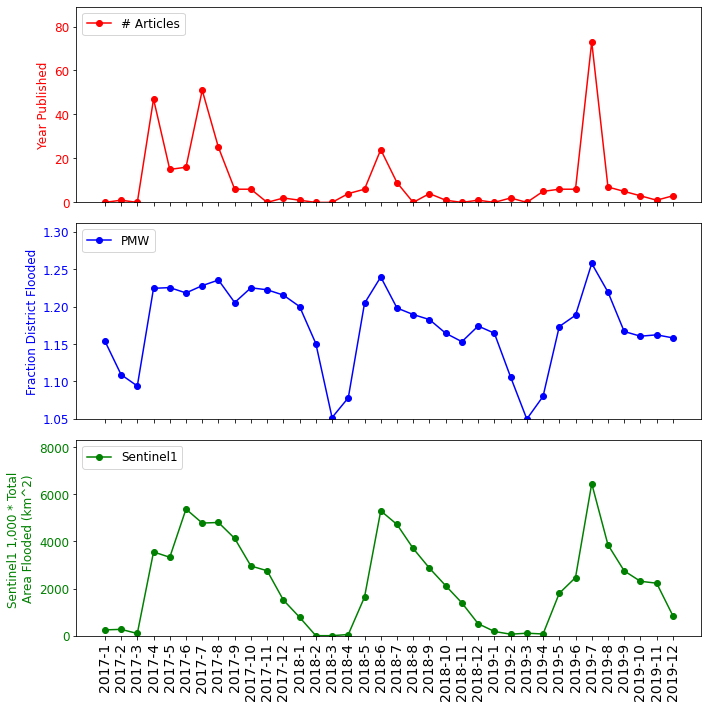

In [4]:
compare_PMW_Sentinel_NLP('sylhet')

### EM-DAT Data

In [12]:
emdat_df = pd.read_csv('other_data/emdat_flood.csv').drop('Unnamed: 0', axis=1).fillna(0)


#### Monthly people affected comparison

<Figure size 1080x504 with 0 Axes>

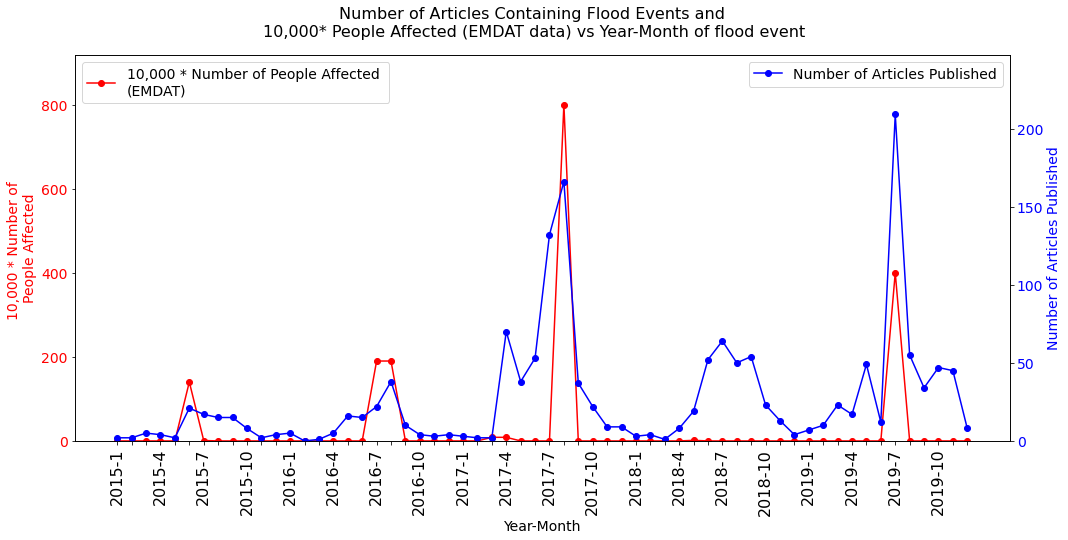

In [18]:
yearPublished_count_list, yearPublished_month_count_list_2007, yearPublished_month_count_list_2014, \
    yearPublished_month_count_list_2020 = plot_year_yearmonth_load('timeseries_data/all.json', '', plot=False)
year_month = []
for row in emdat_df.iterrows():
#     new_arr = []
    if int(row[1]['Start Month']):
        year_month.append(('{}-{}'.format(int(row[1]['Start Year']), int(row[1]['Start Month'])), 
                           row[1]['Total Affected']/10000))
    if int(row[1]['End Month']):
        year_month.append(('{}-{}'.format(int(row[1]['End Year']), int(row[1]['End Month'])), 
                        row[1]['Total Affected']/10000))

yearPublished_month_count_list_2020_2, year_month = match_years_months(yearPublished_month_count_list_2020, 
                                                                       year_month, [2015,2019])
plot_2timeseries(
            {'count_list': year_month, 'label':'10,000 * Number of People Affected \n(EMDAT)', 
             'color':'r', 'ylabel':'10,000 * Number of \nPeople Affected'},
            {'count_list': yearPublished_month_count_list_2020_2, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            'Number of Articles Containing Flood Events and \n10,000* People Affected (EMDAT data) vs Year-Month of flood event', 
            'Year-Month', True, skip=3)


#### Yearly People affected comparison with International Newspaper

<Figure size 1080x504 with 0 Axes>

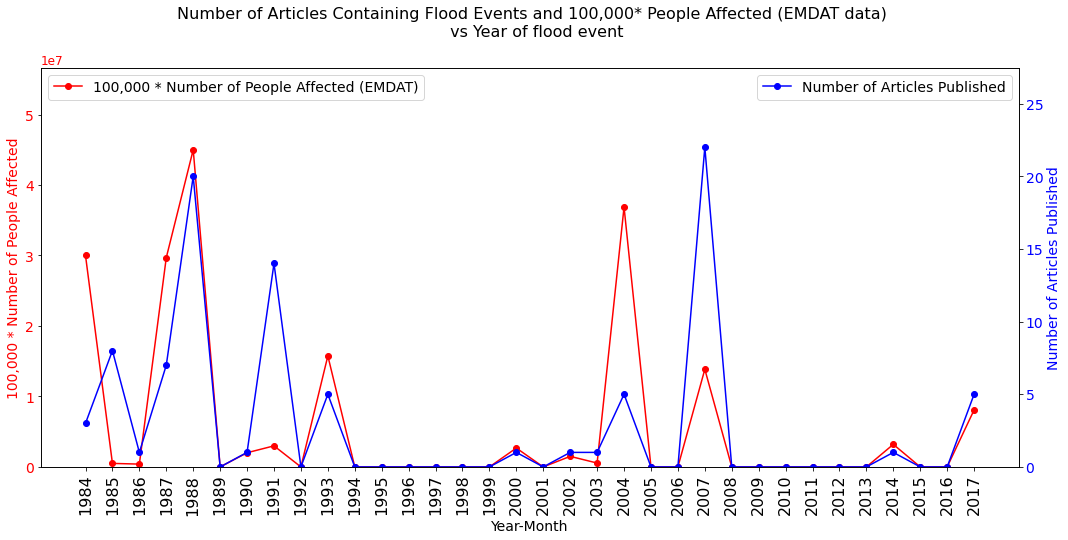

In [19]:
international_newspaper_year = load_year(json.load(open('timeseries_data/international_newspaper.json'))['yearPublished'])
emdat_year = emdat_df.groupby('Start Year').sum()
emdat_year_totalAffected = json.loads(emdat_year['Total Affected'].to_json())

emdat_year_totalAffected2 = load_year(emdat_year_totalAffected, year_range=[None,2019])
international_newspaper_year, emdat_year_totalAffected2 = match_years(international_newspaper_year, 
                                                                   emdat_year_totalAffected2, match_type='remove', complete=True)
plot_2timeseries(
            {'count_list': emdat_year_totalAffected2, 'label':'100,000 * Number of People Affected (EMDAT)', 
             'color':'r', 'ylabel':'100,000 * Number of People Affected'},
            {'count_list': international_newspaper_year, 'label':'Number of Articles Published', 
             'color': 'b', 'ylabel': 'Number of Articles Published'},
            'Number of Articles Containing Flood Events and 100,000* People Affected (EMDAT data) \n vs Year of flood event', 'Year-Month', True)


### Twitter

In [3]:
def compareTwitter(flood_filepath, twitter_filepath, main_title='', plot=True, aggType=None, skip=None, lagMax=50):
    floodData = json.load(open(flood_filepath))
    floodDataList = complete_day([(k,v) for k,v in floodData.items()], aggType=aggType)
    twitterData = json.load(open(twitter_filepath))
    twitterDataList = complete_day([(k,v) for k,v in twitterData.items()], aggType=aggType)
    if plot:
        plot_2timeseries(
            {'count_list': floodDataList, 'label':'# Articles Published', 
             'color':'r', 'ylabel':'# Articles Published'},
            {'count_list': twitterDataList, 'label':'# Tweets', 
             'color': 'b', 'ylabel': '# Tweets'},
            main_title+' Flood Tweets and # Flood Articles Published vs Date', 'Date', True, skip=skip)
        ccf(floodDataList, twitterDataList, tupList=True, plot=True, 
            title=main_title+' Flood Articles and Flood Tweets', lag_max=65)


<Figure size 1080x504 with 0 Axes>

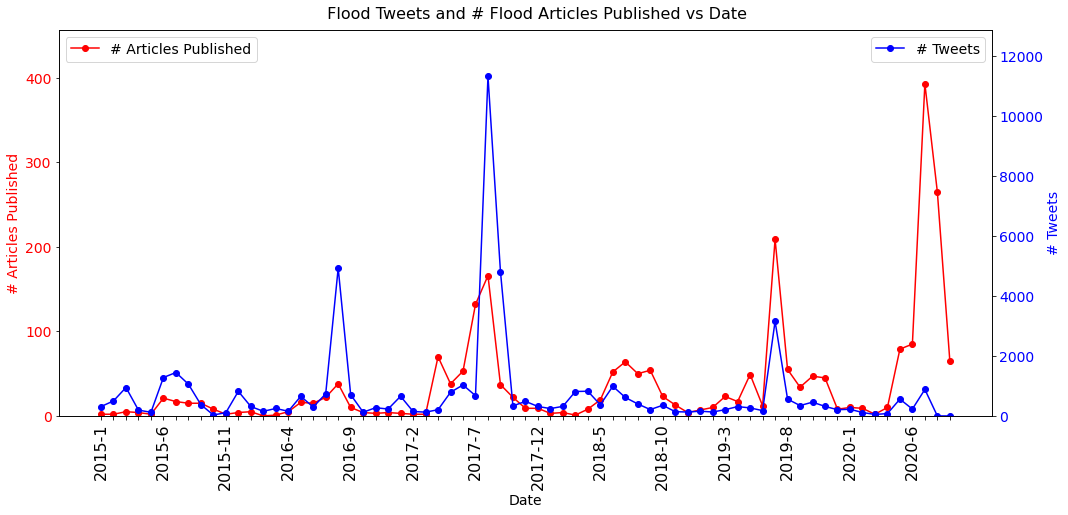

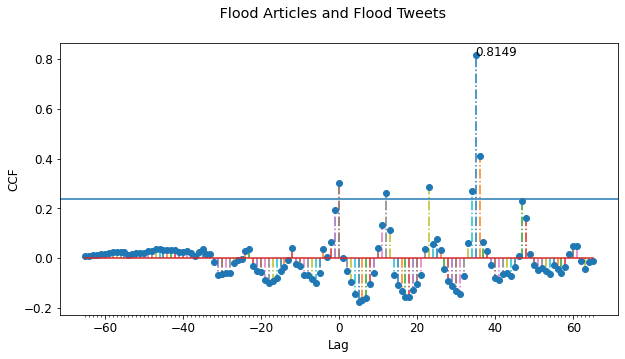

In [5]:
compareTwitter('timeseries_data/yearPublished_day/yearPublished_day.json', 'timeseries_data/twitter/TwitterAll.json', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_barisal.json', 'timeseries_data/twitter/TwitterBarisā.json', main_title='Barisal', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_chittagong.json', 'timeseries_data/twitter/TwitterChittagong.json', main_title='Chittagong', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_dhaka.json', 'timeseries_data/twitter/TwitterDhaka.json', main_title='Dhaka', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_khulna.json', 'timeseries_data/twitter/TwitterKhulna.json', main_title='Khulna', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_rajshahi.json', 'timeseries_data/twitter/TwitterRajshahi.json', main_title='Rajshahi', aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_rangpur.json', 'timeseries_data/twitter/TwitterRangpur.json', main_title=''Rangpur, aggType='month', skip=5)
# compareTwitter('timeseries_data/yearPublished_day/yearPublished_day_sylhet.json', 'timeseries_data/twitter/TwitterSylhet.json', main_title='Sylhet', aggType='month', skip=5)
